In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# add the src folder to the path
import sys
sys.path.append('../')

from src.search import grid_search_cv
from src.utils import load_cup
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy,  MeanEuclideanError
from src.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score
x_train, x_val, y_train, y_val, scaler = load_cup(validation=True, scale_outputs=True)
y_train.shape

(895, 2, 1)

In [ ]:
model = Network(9)
model.add_layer(2, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [ ]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
metric(y_pred_new, y_val_new)

## Second try, with two hidden layers, no regularizer


#### 5-5 architecture

In [ ]:
model = Network(9)
model.add_layer(5, ReLU())
model.add_layer(5, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

In [ ]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### 10-5 architecture

In [ ]:
model = Network(9)
model.add_layer(10, ReLU())
model.add_layer(5, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,b
    callbacks=[EarlyStopping(50)]
)

In [ ]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

#### 8-8 architecture

In [ ]:
model = Network(9)
model.add_layer(8, ReLU())
model.add_layer(8, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [ ]:
y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### 16-8 architecture

In [ ]:
model = Network(9)
model.add_layer(16, ReLU())
model.add_layer(8, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))
print()

#### maybe add regularization

In [ ]:
from src.regularizers import L1, L2

reg = 1e-7
model = Network(9, L2(reg))
model.add_layer(16, ReLU())
model.add_layer(8, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.9, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### increase regularization strength

In [ ]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(16, ReLU())
model.add_layer(16, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.9, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### 32-16

In [ ]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(32, ReLU())
model.add_layer(16, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.6, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

### overfitting a bit, try improving 16-16 with 24-16

In [ ]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(24, ReLU())
model.add_layer(16, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### Trying 16-24

In [ ]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(16, ReLU())
model.add_layer(24, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

#### Try 24-24

In [ ]:
from src.regularizers import L1, L2

reg = 1e-6
model = Network(9, L2(reg))
model.add_layer(24, ReLU())
model.add_layer(24, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-3, 
    nesterov=0.8, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))

# GridSearch

### Starting with 16-24

In [ ]:
from src.search import grid_search_cv
from src.regularizers import L1, L2
from src.validation import kfold_cv
X, y, scaler = load_cup(validation=False, scale_outputs=True)
y_train.shape

In [ ]:
model = Network(9)
model.add_layer(16, ReLU())
model.add_layer(24, ReLU())
model.add_layer(2, Sigmoid())

kfold_cv(
    model=model,
    k=3,
    x=X,
    y=y,
    loss=MeanSquaredError(),
    metric=MeanEuclideanError(),
    epochs=20,
    eta=10e-3,
    nesterov=0.8,
    scaler=scaler,
    verbose=True
)

## Try 3 Hidden Layer

Training:  91%|█████████▏| 913/1000[, loss=0.00332, val_loss=0.00466, val_acc=0.0742]


MEE (real scale): 1.4835476175507245


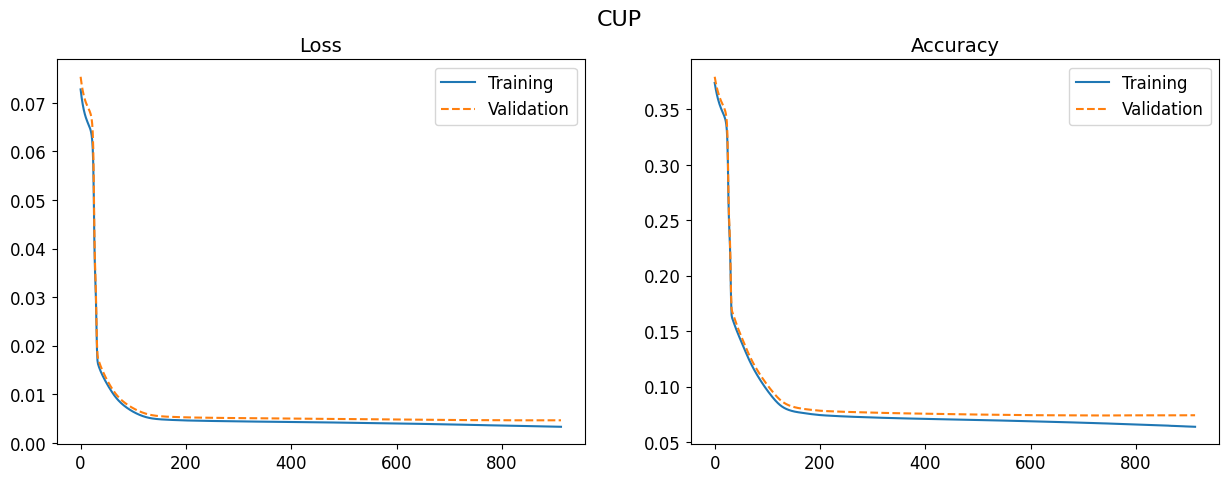

In [6]:
from src.regularizers import L1, L2

reg = 1e-8
model = Network(9, L2(reg))
model.add_layer(128, ReLU())
model.add_layer(64, ReLU())
model.add_layer(32, ReLU())
model.add_layer(2, Sigmoid())

stats = model.train(
    eta=10e-4, 
    nesterov=0.9, 
    train=(x_train, y_train), 
    validation=(x_val, y_val), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=1000,
    callbacks=[EarlyStopping(50)]
)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
#add title to figure
fig.suptitle('CUP', fontsize=16)

sns.lineplot(stats['train_loss'], ax=axs[0], label='Training')
sns.lineplot(stats['val_loss'], ax=axs[0], label='Validation', linestyle='--')
sns.lineplot(stats['train_acc'], ax=axs[1], label='Training')
sns.lineplot(stats['val_acc'], ax=axs[1], label='Validation', linestyle='--')

#add title and legend
axs[0].set_title('Loss', fontsize=14)
axs[1].set_title('Accuracy', fontsize=14)
axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)
#increase font size
axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)

y_pred = model.multiple_outputs(x_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_val_new = scaler.inverse_transform(y_val.reshape((y_val.shape[0], y_val.shape[1]))).reshape(y_val.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_val_new))